In [119]:
from datetime import timedelta
from datetime import datetime
import pandas as pd
import numpy as np
import os
import sys



In [61]:
page = pd.read_html('https://www.nytimes.com/interactive/2020/11/03/us/elections/results-michigan.html')
page

[                                 Candidate  \
 0                                      NaN   
 1                                      NaN   
 2                                      NaN   
 3                                      NaN   
 4                                      NaN   
 5                                      NaN   
 6                                      NaN   
 7                                      NaN   
 8  View all candidates Collapse candidates   
 
                                Candidate.1  \
 0         Biden Joseph R. Biden Jr. Winner   
 1                  Trump* Donald J. Trump*   
 2                   Jorgensen Jo Jorgensen   
 3                    Hawkins Howie Hawkins   
 4              Blankenship Don Blankenship   
 5                      Write-ins Write-ins   
 6          De La Fuente Rocky De La Fuente   
 7            Total reported Total reported   
 8  View all candidates Collapse candidates   
 
                                      Party  \
 0       

In [60]:
def is_votes_table(columns):
    head = {'County' : 0, 'Margin': 0, 'Total votes':0}
    for col in columns:
        head[col] = 1
    return sum(head.values()) == len(head)

def find_votes_table(page):
    for table in page:
        if is_votes_table(table.columns):
            return table
    return None

In [62]:
df_vote = find_votes_table(page)
df_vote

,County,Margin,2016 margin,Est. votes reported,Est. votes reported.1,Total votes,Absentee
0,Roscommon,Trump +30,R+29.4,96%,NaN,15018,—
1,Genesee,Biden +9,D+9.4,97%,NaN,222969,97414
2,Muskegon,Biden +1.1,D+1.5,97%,NaN,91701,47732
3,Berrien,Trump +7,R+12.7,97%,NaN,82404,—
4,Kalamazoo,Biden +19,D+12.8,98%,NaN,143640,—
5,Wayne,Biden +37,D+37.1,>98%,NaN,863382,436037
6,Oakland,Biden +14,D+8.1,>98%,NaN,778418,512154
7,Macomb,Trump +8,R+11.5,>98%,NaN,496523,—
8,Kent,Biden +6,R+3.1,>98%,NaN,359915,—
9,Washtenaw,Biden +47,D+41,>98%,NaN,216924,155858


In [2]:
#data source = 'https://www.nytimes.com/interactive/2020/11/03/us/elections/results-michigan.html'

raw_csv = pd.read_csv('mi_vote_counties.csv')
raw_csv['Votes'] = raw_csv['Total votes'].str.replace(',', '')
raw_csv

,County,Margin,2016 margin,Est. votes reported,Unnamed: 4,Total votes,Absentee,Unnamed: 7,Unnamed: 8,Votes
0,Roscommon,Trump +30,R+29.4,96%,NaN,"15,018",?,NaN,NaN,15018
1,Genesee,Biden +9,D+9.4,97%,NaN,"222,969","97,414",NaN,NaN,222969
2,Muskegon,Biden +1.1,D+1.5,97%,NaN,"91,701","47,732",NaN,NaN,91701
3,Berrien,Trump +7,R+12.7,97%,NaN,"82,404",?,NaN,NaN,82404
4,Kalamazoo,Biden +19,D+12.8,98%,NaN,"143,640",?,NaN,NaN,143640
5,Wayne,Biden +37,D+37.1,>98%,NaN,"863,382","436,037",NaN,NaN,863382
6,Oakland,Biden +14,D+8.1,>98%,NaN,"778,418","512,154",NaN,NaN,778418
7,Macomb,Trump +8,R+11.5,>98%,NaN,"496,523",?,NaN,NaN,496523
8,Kent,Biden +6,R+3.1,>98%,NaN,"359,915",?,NaN,NaN,359915
9,Washtenaw,Biden +47,D+41,>98%,NaN,"216,924","155,858",NaN,NaN,216924


In [68]:
def get_disp(raw_str, tag):
    tks = raw_str.split('+')
    lead = tks[0]
    margin = float(tks[1])
    if (lead.startswith(tag)):
        return (100.0 + margin)/2
    else:
        return (100.0 - margin)/2
    
def calc_1st_digit(total, disp):
    return int(str(int(total) * disp)[0])

def extract_votes_1st_digit(total, margin, tag):    
    return calc_1st_digit(total, get_disp(margin, tag))

In [79]:

def extent_votes(table):
    votes = table[['County', 'Margin']]
    votes['Votes'] = table['Total votes'].str.replace(',', '')
    votes = votes.loc[votes['Votes'].str.match('\d+')]

    votes['Trump 1stDigi'] = votes.apply( \
                             lambda x : \
                                extract_votes_1st_digit(x['Votes'], x['Margin'], 'T'), axis=1)

    votes['Biden 1stDigi'] = votes.apply( \
                             lambda x : \
                                extract_votes_1st_digit(x['Votes'], x['Margin'], 'B'), axis=1)
    
    votes['Vote 1stDigi'] = votes.apply(lambda x : int(x['Votes'][0]), axis=1)

    return votes



In [84]:
votes = extent_votes(df_vote)
votes.groupby(['Vote 1stDigi']).count()['County']/len(votes)

/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Vote 1stDigi
1    0.361446
2    0.156627
3    0.108434
4    0.072289
5    0.060241
6    0.084337
7    0.036145
8    0.096386
9    0.024096
Name: County, dtype: float64

In [105]:

def make_benford(votes):
    benford = pd.DataFrame(\
                           {'digit': range(0, 10),\
                            'Benford' : [0, 0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]})
    benford['Total'] = votes.groupby(['Vote 1stDigi']).count()['County']/len(votes)
    benford['Trump'] = votes.groupby(['Trump 1stDigi']).count()['County']/len(votes)
    benford['Biden'] = votes.groupby(['Biden 1stDigi']).count()['County']/len(votes)
    benford = benford[benford['digit'] > 0]
    return benford


In [106]:
benford = make_benford(votes)
benford

,digit,Benford,Total,Trump,Biden
1,1,0.301,0.361446,0.289157,0.168675
2,2,0.176,0.156627,0.156627,0.216867
3,3,0.125,0.108434,0.132530,0.108434
4,4,0.097,0.072289,0.120482,0.084337
5,5,0.079,0.060241,0.084337,0.108434
6,6,0.067,0.084337,0.036145,0.132530
7,7,0.058,0.036145,0.024096,0.060241
8,8,0.051,0.096386,0.072289,0.048193
9,9,0.046,0.024096,0.084337,0.072289


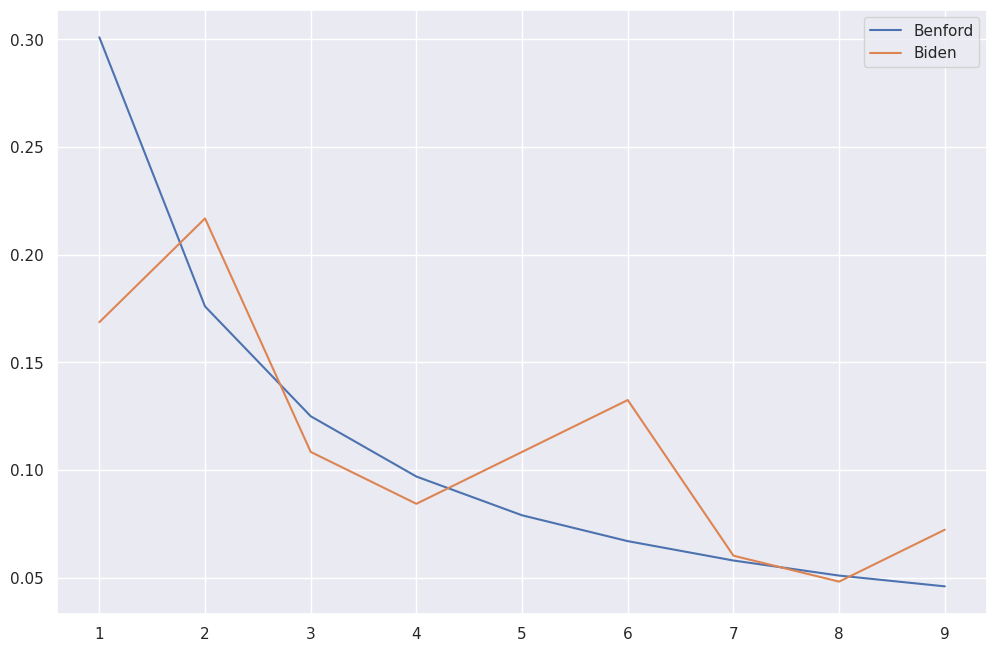

In [118]:
ax = benford[['Benford', 'Biden']].plot()

In [108]:
def election_benford(url):
    page = pd.read_html(url)
    df_vote = find_votes_table(page)
    votes = extent_votes(df_vote)
    return make_benford(votes)

/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



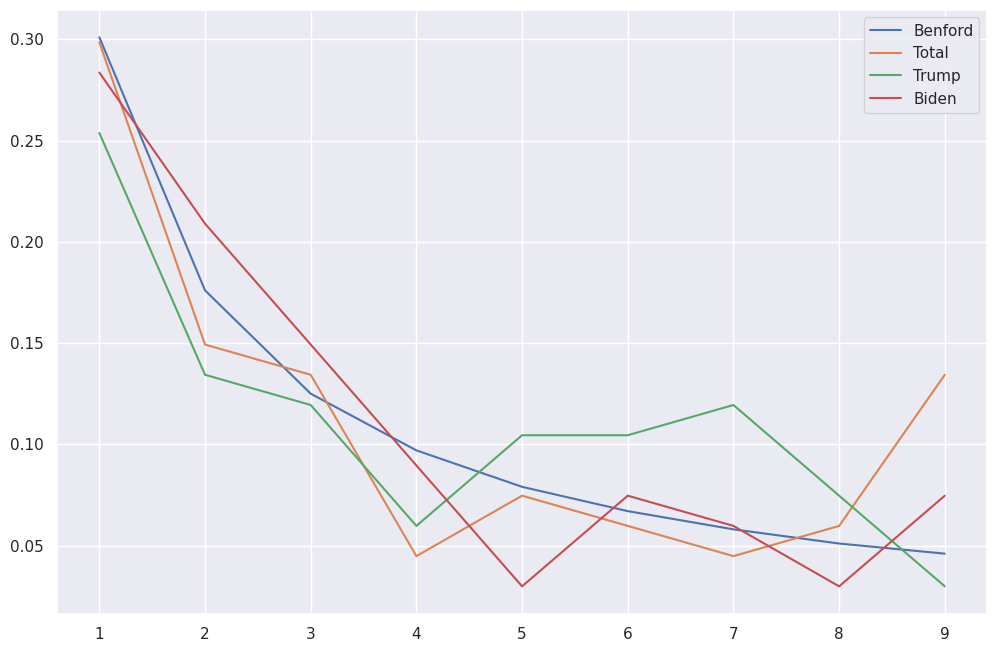

In [111]:
#florida
florida = election_benford('https://www.nytimes.com/interactive/2020/11/03/us/elections/results-florida.html')
ax = florida[['Benford', 'Total', 'Trump', 'Biden']].plot()

/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



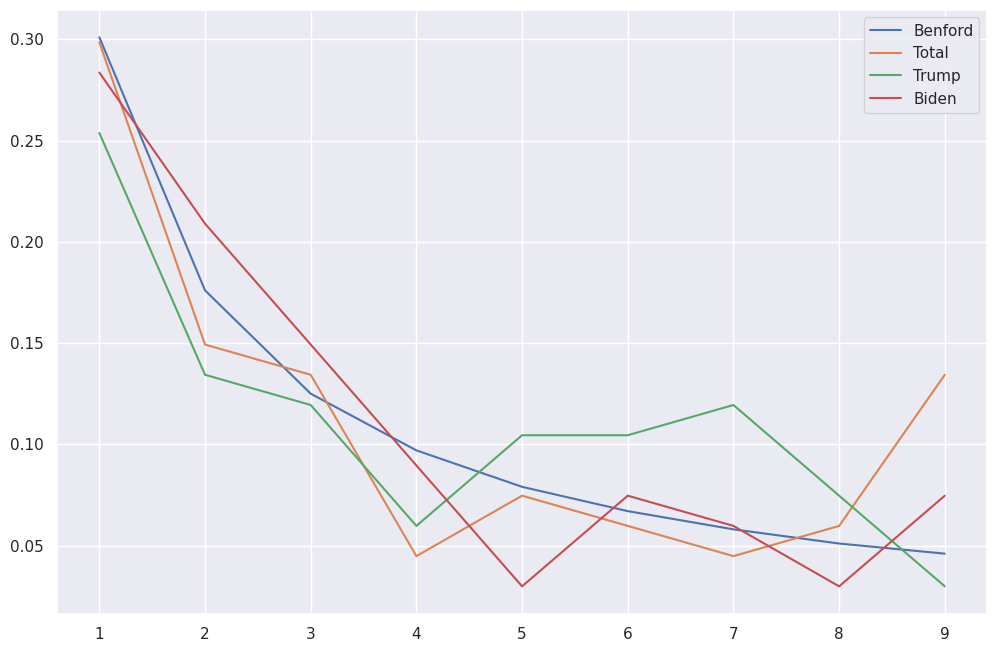

In [112]:
#wisconsin
wisconsin = election_benford('https://www.nytimes.com/interactive/2020/11/03/us/elections/results-florida.html')
ax = wisconsin[['Benford', 'Total', 'Trump', 'Biden']].plot()

In [114]:
#arizona
arizona = election_benford('https://www.nytimes.com/interactive/2020/11/03/us/elections/results-arizona.html')
arizona
#ax = arizona[['Benford', 'Total', 'Trump', 'Biden']].plot()

/home/jupyter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,digit,Benford,Total,Trump,Biden
1,1,0.301,0.400000,0.133333,0.266667
2,2,0.176,0.133333,0.266667,0.266667
3,3,0.125,0.066667,0.133333,0.133333
4,4,0.097,NaN,0.066667,0.133333
5,5,0.079,0.200000,NaN,0.066667
6,6,0.067,0.133333,0.066667,0.066667
7,7,0.058,0.066667,0.133333,NaN
8,8,0.051,NaN,0.066667,NaN
9,9,0.046,NaN,0.133333,0.066667


In [40]:
margin_df['2020_who'] = margin_df['Margin'].str.split('+', expand=True)[0].str.strip()
margin_df['2020_margin'] = pd.to_numeric(margin_df['Margin'].str.split('+', expand=True)[1].str.strip())

margin_df['2016_who'] = margin_df['2016 margin'].str.split('+', expand=True)[0].str.strip()
margin_df['2016_margin'] = pd.to_numeric(margin_df['2016 margin'].str.split('+', expand=True)[1].str.strip())

margin_df['2020_who_num'] = np.where(margin_df['2020_who'] == 'Trump', 1, 0)
margin_df['2016_who_num'] = np.where(margin_df['2016_who'] == 'R', 1, 0)

margin_df

,County,Margin,2016 margin,Votes,2020_who,2020_margin,2016_who,2016_margin,2020_who_num,2016_who_num
0,Roscommon,Trump +30,R+29.4,15018,Trump,30.0,R,29.4,1,1
1,Genesee,Biden +9,D+9.4,222969,Biden,9.0,D,9.4,0,0
2,Muskegon,Biden +1.1,D+1.5,91701,Biden,1.1,D,1.5,0,0
3,Berrien,Trump +7,R+12.7,82404,Trump,7.0,R,12.7,1,1
4,Kalamazoo,Biden +19,D+12.8,143640,Biden,19.0,D,12.8,0,0
5,Wayne,Biden +37,D+37.1,863382,Biden,37.0,D,37.1,0,0
6,Oakland,Biden +14,D+8.1,778418,Biden,14.0,D,8.1,0,0
7,Macomb,Trump +8,R+11.5,496523,Trump,8.0,R,11.5,1,1
8,Kent,Biden +6,R+3.1,359915,Biden,6.0,R,3.1,0,1
9,Washtenaw,Biden +47,D+41,216924,Biden,47.0,D,41.0,0,0


In [41]:
display('R -> D this year')
display(margin_df.loc[lambda x: (x['2016_who_num'] == 1) & (x['2020_who_num'] == 0)])

display('D -> R this year')
display(margin_df.loc[lambda x: (x['2016_who_num'] == 0) & (x['2020_who_num'] == 1)])

'R -> D this year'

,County,Margin,2016 margin,Votes,2020_who,2020_margin,2016_who,2016_margin,2020_who_num,2016_who_num
8,Kent,Biden +6,R+3.1,359915,Biden,6.0,R,3.1,0,1
13,Saginaw,Biden +0.3,R+1.1,103347,Biden,0.3,R,1.1,0,1
52,Leelanau,Biden +5,R+3.1,16930,Biden,5.0,R,3.1,0,1


'D -> R this year'

,County,Margin,2016 margin,Votes,2020_who,2020_margin,2016_who,2016_margin,2020_who_num,2016_who_num


In [34]:
margin_df.corr()

,2020_margin,2016_margin,2020_who_num,2016_who_num
2020_margin,1.000000,0.955245,0.265294,0.099136
2016_margin,0.955245,1.000000,0.410185,0.229271
2020_who_num,0.265294,0.410185,1.000000,0.835573
2016_who_num,0.099136,0.229271,0.835573,1.000000


In [51]:
htmldf = pd.read_html('https://www.nytimes.com/interactive/2020/11/03/us/elections/results-georgia.html')
len(htmldf)

11

In [58]:
df = pd.DataFrame(htmldf[1].loc[lambda x: x['Total votes'] != 'View all Collapse'])
df['Total votes'] = pd.to_numeric(df['Total votes'])
df.sort_values(by='Total votes', ascending=False)

,County,Margin,2016 margin,Est. votes reported,Est. votes reported.1,Total votes,Absentee
1,Fulton,Biden +46,D+40.9,>98%,NaN,514694,457183
2,Gwinnett,Biden +18,D+5.8,>98%,NaN,412757,339953
3,Cobb,Biden +14,D+2.2,>98%,NaN,392614,322611
4,DeKalb,Biden +67,D+62.9,>98%,NaN,367359,320485
5,Cherokee,Trump +39,R+49.1,>98%,NaN,144598,113321
6,Chatham,Biden +19,D+14.7,>98%,NaN,133289,96105
7,Forsyth,Trump +33,R+46.9,>98%,NaN,129237,115707
8,Henry,Biden +20,D+4.4,>98%,NaN,122742,105982
9,Clayton,Biden +71,D+70.1,>98%,NaN,111077,90757
10,Hall,Trump +43,R+50,>98%,NaN,90424,75064
